# MNIST model


Summary:
This notebook was used to generate the model used in the app found here: 
https://cpkaz.github.io/Home/DigitApp.html
I also include commentary for anyone interested in the making of the app.

I specifically picked this data, because I wanted to deliver an ML experience that anyone could underestand. I wanted users to be able to be able to interact with my project in a fun way by drawing their input. The MNIST data is black and white, and easy to replicate with users drawing with a mouse on a simple html canvas. Thus, the MNIST data was a clear winner, given the content I wanted to produce.

  This data comes with one drawback, in that it's so well-documented that it's hard to do anything remarkable with it in terms of modelling. There are thousands of pre-trained models out there for these specific images. I could have imported one, but I elected to train mine from scractch. I generated new data by shifting and rotating some of the images at random, and then used a simple convolutional framework for the digit recognition.




In [ ]:
import matplotlib.pyplot as plt
from scipy import ndimage
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import keras
mnist = sklearn.datasets.fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]

In [ ]:
X = np.reshape(X, [70000, 28, 28, 1])

# Applying Transformations

Below are a few functions I wrote to apply transformations to the data. I anticipate that the users of my web page might write in ways that will confuse the model, so I'm modifying the existing images to train the model to recognize the numbers when they're slightly out of place. Here, I add 90 thousand additional images, with shifts of 3 pixels upward, downward, left, right, and 15 degree rotations in either direction.

I got the ideas for these transformations from this article:
https://towardsdatascience.com/going-beyond-99-mnist-handwritten-digits-recognition-cfff96337392

In [ ]:
def shift_right(arr, n):
  if n > 0:
    arr = np.roll(arr, n, axis=1)
    arr[:, 0:n] = 0
  else:
    l = len(arr[0])+1
    arr = np.roll(arr, n, axis=1)
    f = l + n - 1
    arr[:, f:l] = 0
  return arr

def shift_up(arr, n):
  if n > 0:
    arr = np.roll(arr, -1*n, axis=0)
    l = len(arr[0])
    f = l - n - 1
    arr[f:l, :] = 0
  else:
    arr = np.roll(arr, -1*n, axis=0)
    arr[0:-1*n, :] = 0
  return arr

def rot(img, deg):
  i = ndimage.rotate(img, deg, reshape=False)
  for k in range(28):
    for j in range(28):
      if i[k][j] > 255:
        i[k][j] = 255
      elif i[k][j] < 50:
        i[k][j] = 0
  return i

In [ ]:
rR = np.random.choice(range(70000), 15000, replace=False)
rL = np.random.choice(range(70000), 15000, replace=False)
sU = np.random.choice(range(70000), 15000, replace=False)
sD = np.random.choice(range(70000), 15000, replace=False)
sR = np.random.choice(range(70000), 15000, replace=False)
sL = np.random.choice(range(70000), 15000, replace=False)

In [ ]:
numbers = [rR, rL, sU, sD, sR, sL]
functions = [rot, rot, shift_up, shift_up, shift_right, shift_right]
values = [15, -15, 3, -3, 3, -3]

In [ ]:
new_ys = []
for j in numbers:
  for k in j:
    new_ys.append(y[k])

In [ ]:
transform_array = []
for nums, func, val  in zip(numbers, functions, values):
  for i in nums:
    t = func(X[i], val)
    transform_array.append(t)

In [ ]:
tar = np.array(transform_array)
X = np.concatenate((X, tar))
y = np.concatenate((y, new_ys))

# Example Images

Below is an image drawn from the data, along with a rotated version. I originally rotated the numbers by 30 degrees, but the angle was too severe so many of the numbers were at a much steeper angle than what a human might draw. 15 degrees was a good balance between creating observations that differed from the original data, and generating images that a human might actually draw.

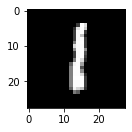

In [ ]:
plt.subplot(131)
plt.imshow(np.reshape(X[rL[4]], (28, 28)), cmap='gray')

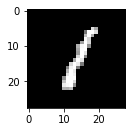

In [ ]:
plt.subplot(131)
plt.imshow(np.reshape(transform_array[10004], (28, 28)), cmap='gray')

Below is an image drawn with the html canvas, it's much brighter, as the html pen in only one color, white. Any dark areas are caused by compression to 28x28 pixels.

(-0.5, 27.5, 27.5, -0.5)

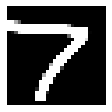

In [ ]:
digit = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,253,173,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,178,28,0,0,0,0,0,0,0,0,0,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,0,0,0,0,0,0,17,88,238,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,103,255,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,170,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,34,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,255,255,255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
digit_pixels = digit.reshape(28, 28)
plt.subplot(131)
plt.imshow(digit_pixels, cmap='gray')
plt.axis('off')

(-0.5, 27.5, 27.5, -0.5)

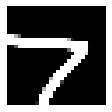

In [ ]:
dp = shift_up(digit_pixels, -4)
plt.subplot(131)
plt.imshow(dp, cmap='gray')
plt.axis('off')

# Setting up the Data and Training the Model

In [ ]:
digits = []
for i in range(len(X)):
  digits.append([X[i], y[i]])
train, test = train_test_split(digits, test_size=.2, random_state=42)

In [ ]:
X_train = np.array([a[0] for a in train])
y_train = np.array([np.float64(a[1]) for a in train])

X_test = np.array([a[0] for a in test])
y_test = np.array([np.float64(a[1]) for a in test])

Initially, I just used a simple dense neural network, which did reasonably well. However, the model didn't do well in the field, so I switch to a CNN. I tried a few different configurations. Many of them had more filters and layers, but this simple one did the best.

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(32, kernel_size=3, activation="relu"))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(.4))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy')

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=20)

Epoch 1/5
6400/6400 [==============================] - 74s 11ms/step - loss: 1.2223
Epoch 2/5
6400/6400 [==============================] - 74s 12ms/step - loss: 0.2846
Epoch 3/5
6400/6400 [==============================] - 76s 12ms/step - loss: 0.2709
Epoch 4/5
6400/6400 [==============================] - 73s 11ms/step - loss: 0.2615
Epoch 5/5
6400/6400 [==============================] - 73s 11ms/step - loss: 0.2594


In [ ]:
y_pred = [np.argmax(i) for i in model.predict(X_test)]

The accuracy isn't the highest I've seen compared to other models using MNIST digit data, but I'm not concerned. The final product will have to take in data that doesn't look exactly like what it sees in this dataset. The javascript canvas drawings can't mimic the writing seen in these images exactly, so overfitting could greatly diminish performance. Tuning the model to get higher test scores might not necessarily make it perform better in the field, and could even make it worse.

In [ ]:
accuracy_score(y_test, y_pred)

0.95434375

# Exporting Model

In [ ]:
import tensorflowjs as tfjs

In [ ]:
tfjs.converters.save_keras_model(model, 'model')

In [ ]:
from google.colab import files
files.download('model')

# Limitations

I'm happy with the results of this project. The digit identifier does pretty well, even though the input data differs from the sample data. The two biggest differences are:
 
 1. The color on the html canvas is plain white, while the training data includes white in addition to various shades of grey.
  
  2. The shape of the markings made by the mouse aren't shaped exactly like the markings of the writing utensils used to make the sample data.

I think that the results could be improved by adding more transformations to the sample, and removing certain images that resemble the computer drawings the least. The first method would expose the model to a wider variety of representations of numbers, and allow it to identify more obscure drawings more effectively. The second method would remove observations that aren't reflective of the population we're interested in modeling (the mouse-drawn digits).

Lastly, the biggest problem with this project is that I don't have a scalable way to verify that the model is working. I've tested by myself with dozens of drawings, but I don't have an effective way to measure how well the model is doing. I could save the images users submit, along with a user-provided label of the image and use those for further training, but I'm not sure if there's an effective way to do that with GitHub Pages. Another issue with that approach is that someone could feed the model intentionally wrong data. I could also use a labeling service to generate more data exclusively using my html canvas, but that would cost money.